# Import libraries



In [ ]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
from collections import Counter

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from urllib.parse import urlparse
import re
import requests
from google.colab import userdata

from bs4 import BeautifulSoup, SoupStrainer
from urllib.request import urlopen

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Text Mining - With text in 'sentences' variable, visualize text

In [ ]:
# add earnings_transcript.txt file to the Colab by clicking the file browser on
# left menu and dropping it in... it should be next to the 'sample_data' folder
# once uploaded
with open("/content/earnings_transcript.txt", "r") as f:
  sentences = sent_tokenize(f.read())

In [ ]:
print(len(sentences))
print(sentences[10])

509
I'd like to remind you that our call is being webcast live on NVIDIA's Investor Relations website.


In [ ]:
# for all the tokens, remove any stop_words
filtered_words = []
filtered_words_pos = []

for sent in sentences:
  tokens = word_tokenize(sent)
  tokens_pos = nltk.pos_tag(tokens)
  for tok in tokens_pos:
    if tok[0].casefold() not in stop_words and len(tok[0])>1:
        filtered_words.append(tok[0].lower())

print('Example:',tokens_pos)
print('Most frequent words:',Counter(filtered_words).most_common(15))
word_freq = dict(Counter(filtered_words).most_common())

Example: [('NVIDIA', 'NNP'), ("'s", 'POS'), ('expertise', 'NN'), (',', ','), ('scale', 'NN'), (',', ','), ('and', 'CC'), ('ability', 'NN'), ('to', 'TO'), ('deliver', 'VB'), ('full', 'JJ'), ('stack', 'NN'), ('and', 'CC'), ('full', 'JJ'), ('infrastructure', 'NN'), ('lets', 'VBZ'), ('us', 'PRP'), ('serve', 'VB'), ('the', 'DT'), ('entire', 'JJ'), ('multitrillion-dollar', 'JJ'), ('AI', 'NNP'), ('and', 'CC'), ('robotics', 'NNS'), ('opportunities', 'NNS'), ('ahead', 'RB'), ('from', 'IN'), ('every', 'DT'), ('hyperscale', 'NN'), ('cloud', 'NN'), (',', ','), ('enterprise', 'VB'), ('private', 'JJ'), ('cloud', 'NN'), ('to', 'TO'), ('sovereign', 'VB'), ('regional', 'JJ'), ('AI', 'NNP'), ('clouds', 'NN'), (',', ','), ('on-prem', 'JJ'), ('to', 'TO'), ('industrial', 'JJ'), ('edge', 'NN'), ('and', 'CC'), ('robotics', 'NNS'), ('.', '.')]
Most frequent words: [('ai', 104), ("'s", 82), ("'re", 61), ('nvidia', 57), ('blackwell', 48), ('--', 44), ('data', 43), ('year', 39), ('inference', 35), ('new', 33), (

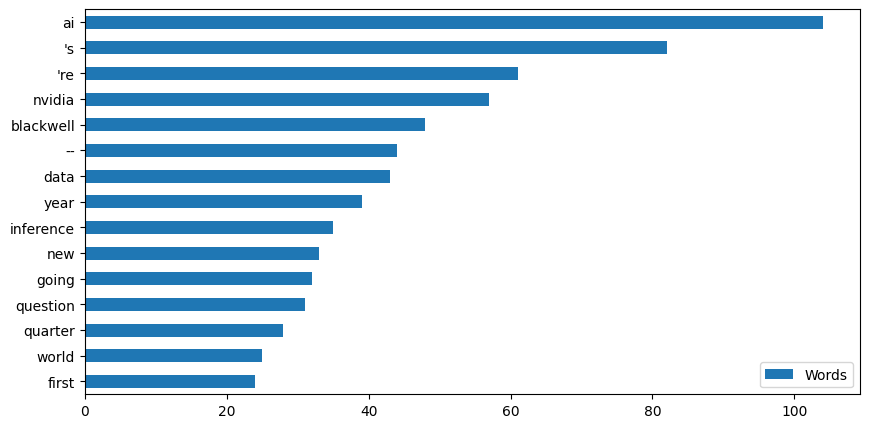

In [ ]:
df = pd.DataFrame.from_dict(dict(Counter(filtered_words).most_common(15)),orient='index',columns=['Words'])
df = df.iloc[::-1]
df.plot(kind='barh',legend=True,figsize=(10,5))
plt.show()

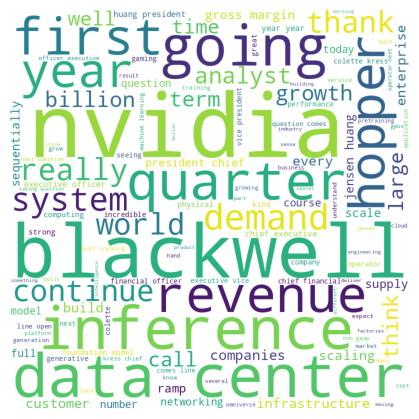

In [ ]:
# generate a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(filtered_words))

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Text Mining w/ NLP -Process text with more NLP into Noun Phrases and find Frequency

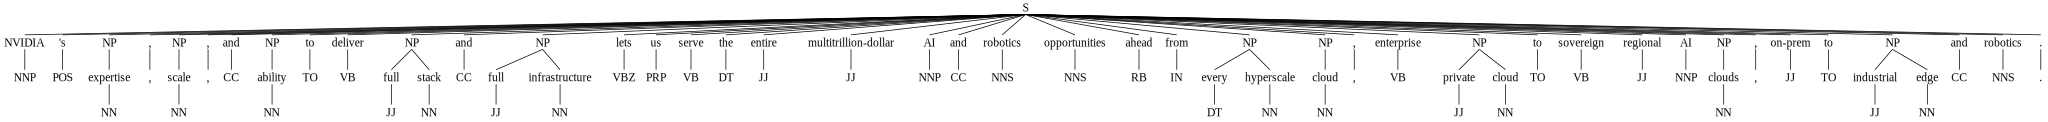

In [ ]:
# Sentences have grammar, which we can use to find more interesting things like noun phrases

gram = ("NP: {<DT>?<JJ>*<NN>}")
noun_phrases = []

# using the grammar rule above, we parse, tokenize, tag with parts of speech, group tokens into a tree structure

for sent in sentences:
  chunking = nltk.RegexpParser(gram)
  sent_token = nltk.word_tokenize(sent)
  tagging = nltk.pos_tag(sent_token)
  tree = chunking.parse(tagging)
  for p in nltk.Tree.subtrees(tree):
    if p.label() == 'NP':
      noun_phrases.append(re.sub(r'[^a-z ]','',str(p)).strip())
tree

In [ ]:
print(Counter(noun_phrases).most_common(10))
np_freq = dict(Counter(noun_phrases).most_common())

[('', 35), ('inference', 28), ('year', 25), ('center', 21), ('the world', 21), ('supply', 14), ('demand', 13), ('time', 13), ('revenue', 12), ('today', 11)]


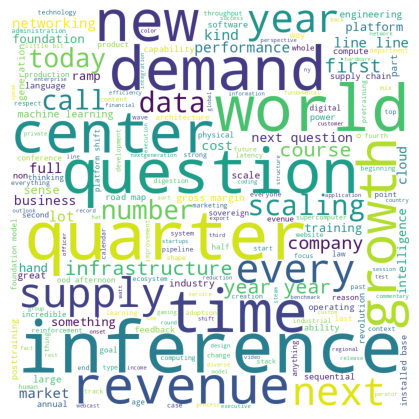

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(noun_phrases))


plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

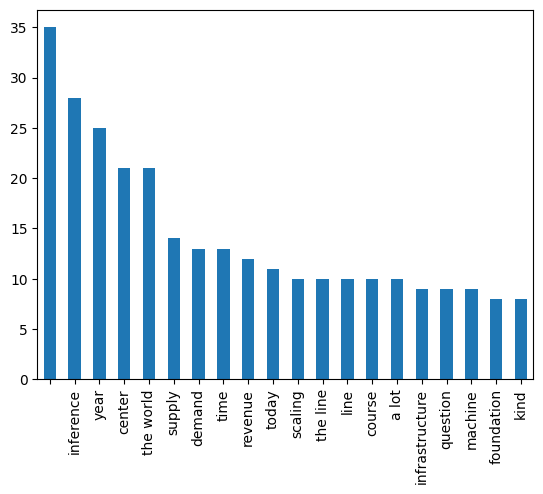

In [ ]:
counts = Counter(dict(Counter(noun_phrases).most_common(20)))
df = pd.DataFrame.from_dict(counts, orient='index')
df.plot(kind='bar',legend=False)
plt.show()

# Text Analytics - Compare result of 2 different NLP approaches for Insights

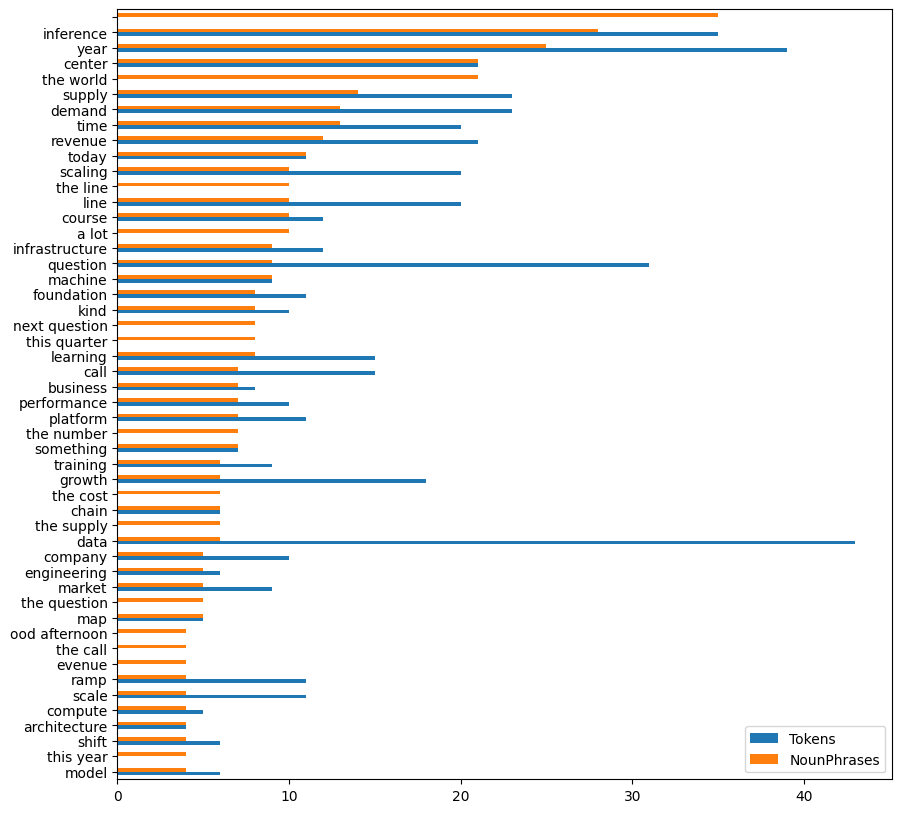

In [ ]:
# np_freq is a sorted desc list of noun phrase frequency
# word_freq is same but for tokesn or words

d1 = {}
d2 = {}
count = 50
for i in np_freq:         # for top noun phrase by freq
  if count > 0:           # we will find top 50 things
    d1[i]=np_freq[i]      # what is freq of noun phrase i, put in d1
    if i in word_freq:    # if i is a single token
      d2[i]=word_freq[i]  # put i in d2 with its freq
    else:
      d2[i]=0             # else put i in d2 with freq 0
    count=count-1

# show the top 50 noun phrases and if its a single token its freq also
# noun phrases vs tokens can yield very different results
df = pd.concat([pd.DataFrame.from_dict(d2,orient='index',columns=['Tokens']), pd.DataFrame.from_dict(d1,orient='index',columns=['NounPhrases'])], axis=1)
df = df.iloc[::-1]
df.plot(kind='barh',legend=True,figsize=(10,10))
plt.show()

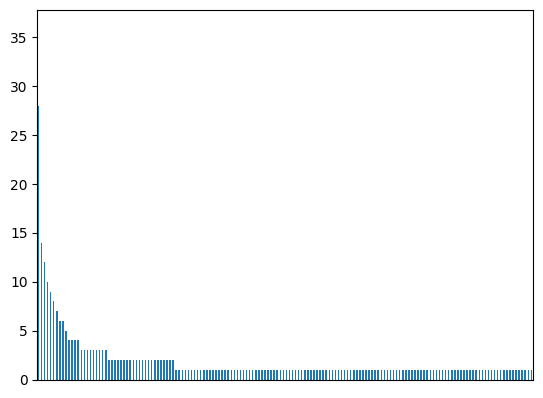

In [ ]:
# These are the most common words used across the BI posts... but are they the most informative?

counts = Counter(dict(Counter(noun_phrases).most_common()))
df = pd.DataFrame.from_dict(counts, orient='index')
df_plot = df.plot(kind='bar',legend=False)
xax = df_plot.axes.get_xaxis()
xax = xax.set_visible(False)
plt.show()

In [ ]:
# where is the most interesting vs least, at top or bottom or middle?
Counter(noun_phrases).most_common(100)

[('', 35),
 ('inference', 28),
 ('year', 25),
 ('center', 21),
 ('the world', 21),
 ('supply', 14),
 ('demand', 13),
 ('time', 13),
 ('revenue', 12),
 ('today', 11),
 ('scaling', 10),
 ('the line', 10),
 ('line', 10),
 ('course', 10),
 ('a lot', 10),
 ('infrastructure', 9),
 ('question', 9),
 ('machine', 9),
 ('foundation', 8),
 ('kind', 8),
 ('next question', 8),
 ('this quarter', 8),
 ('learning', 8),
 ('call', 7),
 ('business', 7),
 ('performance', 7),
 ('platform', 7),
 ('the number', 7),
 ('something', 7),
 ('training', 6),
 ('growth', 6),
 ('the cost', 6),
 ('chain', 6),
 ('the supply', 6),
 ('data', 6),
 ('company', 5),
 ('engineering', 5),
 ('market', 5),
 ('the question', 5),
 ('map', 5),
 ('ood afternoon', 4),
 ('the call', 4),
 ('evenue', 4),
 ('ramp', 4),
 ('scale', 4),
 ('compute', 4),
 ('architecture', 4),
 ('shift', 4),
 ('this year', 4),
 ('model', 4),
 ('gross margin', 4),
 ('o', 4),
 ('ability', 4),
 ('next year', 4),
 ('the reason', 4),
 ('hand', 4),
 ('anything', 4)